A gradient is nothing but a derivative that defines the effects on outputs of the function with a little bit of variation in inputs.

It iteratively adjusts model parameters by moving in the direction of the steepest decrease in the cost function.
The algorithm calculates gradients, representing the partial derivatives of the cost function concerning each parameter.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

C:\Users\mhdfa\AppData\Local\Temp\ipykernel_4992\3551149153.py:15: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3679.)
  y = x @ true_weights.T + true_bias


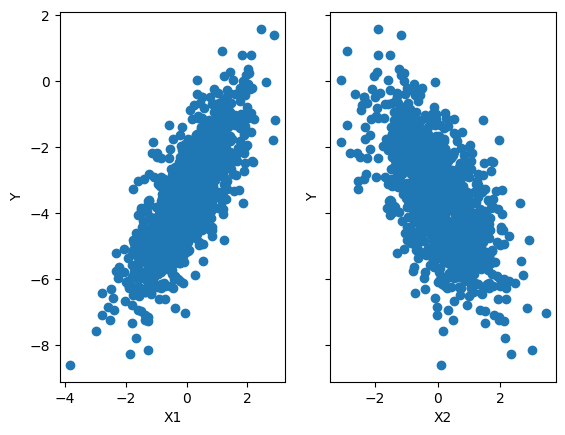

In [2]:
# set random seed for reproducibility
torch.manual_seed(42)

# set number of samples
num_samples = 1000

# create random features with 2 dimensions
x = torch.randn(num_samples, 2)

# create random weights and bias for the linear regression model
true_weights = torch.tensor([1.3, -1])
true_bias    = torch.tensor([-3.5])

# Target variable
y = x @ true_weights.T + true_bias

# Plot the dataset
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)

ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Y')
plt.show()


yp= xW +b

In [3]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out


# Define the input and output dimensions
input_size = x.shape[1]
output_size = 1

# Instantiate the model
model = LinearRegression(input_size, output_size)


In [4]:
# create a random weight & bias tensor
weight = torch.randn(1, input_size)
bias   = torch.rand(1)

# create a nn.Parameter object from the weight & bias tensor
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)

# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param

weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)


Weight : Parameter containing:
tensor([[-0.3239,  0.5574]], requires_grad=True)
bias : Parameter containing:
tensor([0.5710], requires_grad=True)


In [5]:
y_p = model(x)
y_p[:5]


tensor([[ 0.7760],
        [-0.8944],
        [-0.3369],
        [-0.3095],
        [ 1.7338]], grad_fn=<SliceBackward0>)

In [6]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()


# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss


tensor(19.9126, grad_fn=<MeanBackward0>)

Param = Param - L.R * Grad

Epoch [100/1000], weight:[[-0.2618025   0.44433367]], bias:[-0.17722966] Loss: 14.1803
Epoch [200/1000], weight:[[-0.21144074  0.35393423]], bias:[-0.7892358] Loss: 10.3030
Epoch [300/1000], weight:[[-0.17063744  0.2817265 ]], bias:[-1.2897989] Loss: 7.7120
Epoch [400/1000], weight:[[-0.13759881  0.2240814 ]], bias:[-1.699218] Loss: 5.9806
Epoch [500/1000], weight:[[-0.11086453  0.17808874]], bias:[-2.0340943] Loss: 4.8235
Epoch [600/1000], weight:[[-0.08924612  0.14141546]], bias:[-2.3080034] Loss: 4.0502
Epoch [700/1000], weight:[[-0.07177679  0.11219222]], bias:[-2.5320508] Loss: 3.5333
Epoch [800/1000], weight:[[-0.05767059  0.08892146]], bias:[-2.7153134] Loss: 3.1878
Epoch [900/1000], weight:[[-0.04628877  0.07040431]], bias:[-2.8652208] Loss: 2.9569
Epoch [1000/1000], weight:[[-0.0371125   0.05568103]], bias:[-2.9878428] Loss: 2.8026


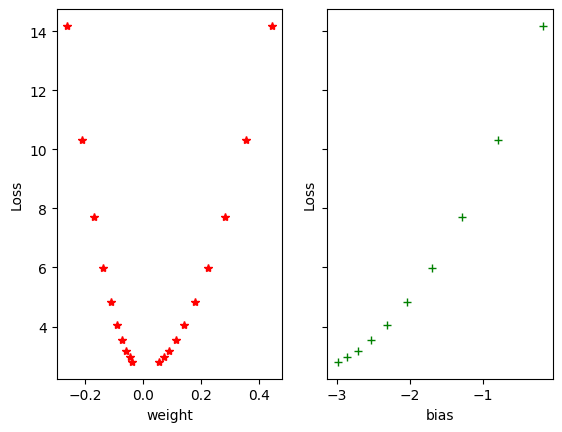

In [7]:
# Number of epochs
num_epochs = 1000

# Learning Rate
learning_rate = 0.01

# SUBPLOT WEIGHT & BIAS VS lOSSES
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)
    loss = Mean_Squared_Error(y_p, y)
    
    # Backproogation 
    # Find the fradient using 
    loss.backward()

    # Learning Rate
    learning_rate = 0.001

    # Model Parameter
    w = model.linear.weight
    b = model.linear.bias

    # Matually Update the model parameter
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad

    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)
            
    if (epoch+1) % 100 == 0:
        ax1.plot(w.detach().numpy(),loss.item(),'r*-')
        ax2.plot(b.detach().numpy(),loss.item(),'g+-')
        print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
            epoch+1,num_epochs,
            w.detach().numpy(),
            b.detach().numpy(),
            loss.item()))
        
ax1.set_xlabel('weight')
ax2.set_xlabel('bias')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
plt.show()


In [8]:
w = model.linear.weight
b = model.linear.bias

print('weight(W) = {} \n  bias(b) = {}'.format(
  w.abs(), 
  b.abs()))


weight(W) = tensor([[0.0371, 0.0557]], grad_fn=<AbsBackward0>) 
  bias(b) = tensor([2.9878], grad_fn=<AbsBackward0>)


In [9]:
pred =  x @ w.T + b
pred[:5]


tensor([[-2.9765],
        [-3.1385],
        [-3.0818],
        [-3.0756],
        [-2.8681]], grad_fn=<SliceBackward0>)